(200, 320)
200
[[7946.7358818]]


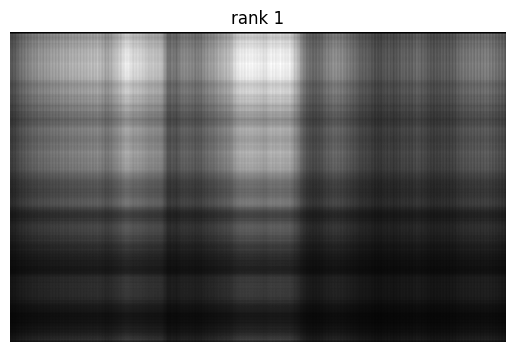

[[7946.7358818    0.       ]
 [   0.        2068.306713 ]]


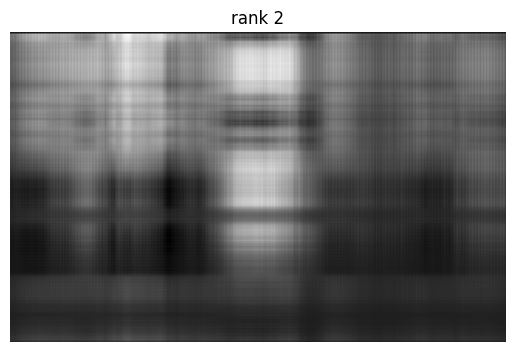

[[7946.7358818     0.            0.            0.            0.        ]
 [   0.         2068.306713      0.            0.            0.        ]
 [   0.            0.         1787.11795324    0.            0.        ]
 [   0.            0.            0.         1266.2666864     0.        ]
 [   0.            0.            0.            0.         1120.23993289]]


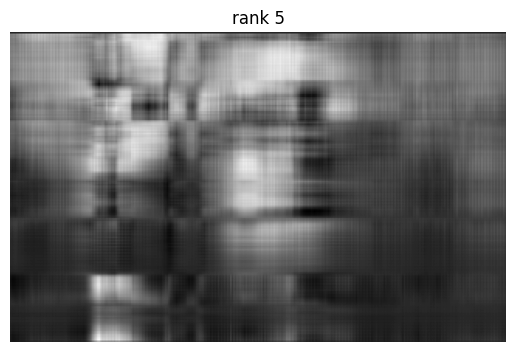

[[7946.7358818     0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.         2068.306713      0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.         1787.11795324    0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.         1266.2666864     0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.         1120.23993289
     0.            0.            0.            0.            0.        ]]


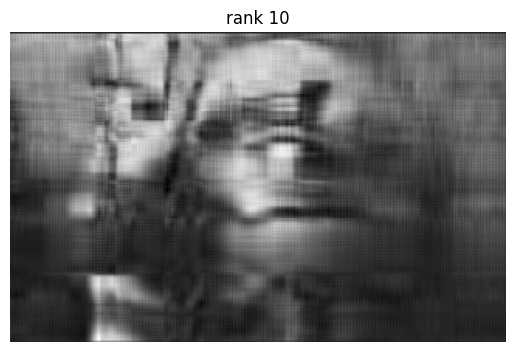

[[7946.7358818     0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.         2068.306713      0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.         1787.11795324    0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.         1266.2666864     0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.      

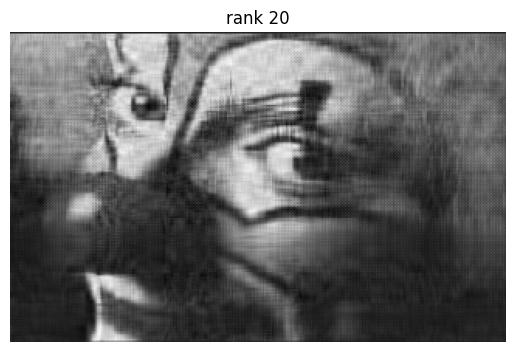

[[7946.7358818     0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.     

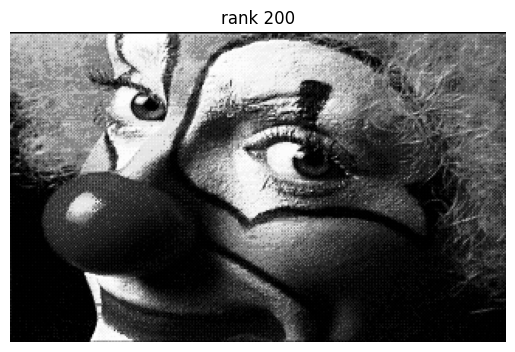

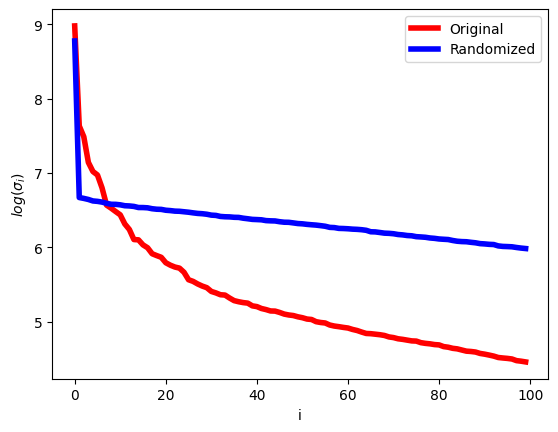

In [21]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import os

try:
    from PIL import Image
except ModuleNotFoundError:
    %pip install -qq pillow
    from PIL import Image
import requests
import io


def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = Image.open('clown.png')
#img.save('clown.png')
#img = matplotlib.image.imread("clown.png")
#X = rgb2gray(img)
X = np.array(img)
print(X.shape)
r = np.linalg.matrix_rank(X)
print(r)

U, sigma, V = np.linalg.svd(X, full_matrices=True)
print(U.shape)
print(sigma.shape)
print(V.shape)
ranks = [1, 2, 5, 10, 20, r]
R = len(ranks)

for i in range(R):
    k = ranks[i]
    #x_hat = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])  
    x_hat = np.dot(np.dot(U[:, :k], np.diag(sigma[:k])), V[:k, :]) 
    # print(U[:k, :].shape) 
    # print(np.diag(sigma[:k])[:5]) 
    # print(V[:k, :].shape)
    # print(V[:, :k].shape)
    # x_hat = np.dot(np.dot(U[:, :k], np.diag(sigma[(r-k):])), V[:k, :])   
    plt.imshow(x_hat, cmap='gray')
    plt.title("rank {}".format(k))
    plt.axis("off")
    plt.show()

k = 100
plt.plot(np.log(sigma[:k]), 'r-', linewidth=4, label="Original")
plt.ylabel(r"$log(\sigma_i)$")
plt.xlabel("i")


# Compare this to a random shuffled version of the image
x2 = np.random.permutation(X)
# so we convert to a 1d vector, permute, and convert back
x1d = X.ravel()
np.random.shuffle(x1d) # inplace
x2 = x1d.reshape(X.shape)
U, sigma2, V = np.linalg.svd(x2, full_matrices = False)
plt.plot(np.log(sigma2[:k]), 'b', linewidth=4, label="Randomized")
plt.legend()
plt.show()
